## Проект: Принятие решений в бизнесе на основе данных. Приоретизация гипотез и A/B  тестирование

### Изучение данных

In [1]:
# загрузим нужные библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 100

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [2]:
# Читаем и изучаем предоставленные файлы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis.info()
hypothesis.head(11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 440.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# уберем заглавные буквы из названия столбцов для отднотипности
hypothesis.columns = ['hypothesis','reach','impact','confidence','efforts']

In [5]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


###### Вывод: Получено три датасета hypothesis, visitors, orders. Значения null отсутсвуют, типы данных удовлетворяют алгоритмам исследования.

### Часть 1. Приоритизация гипотез.

In [7]:
# Рассчитаем показатели  ice и rice
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['rice'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

In [8]:
# Отсортировать гипотезы для ice
print(hypothesis.sort_values(by='ice', ascending=False)[['hypothesis', 'ice']])

                                                                                            hypothesis  \
8                                              Запустить акцию, дающую скидку на товар в день рождения   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главн

In [9]:
# Отсортировать гипотезы для rice
print(hypothesis.sort_values(by='rice', ascending=False)[['hypothesis', 'rice']])

                                                                                            hypothesis  \
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
8                                              Запустить акцию, дающую скидку на товар в день рождения   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                     Изменить цвет фона главн

Вывод: У нас уже есть дата фрейм с собранными метриками (Reach,	Impact,	Confidence,	Efforts) с определенной командой аналитиков значением и закономерностью метрик, для приоритизации гипотез была использована формула ice и rice. Очень похожие метрики за исключением второй которая так же еще учитывает "стоимость" гипотезы. И благодаря этому параметру решение по проведению тестов по этим гипотезам будет приоретизироваться в зависимости от совокупных параметров. Допустим мы видим, на самом ярком примере, что гипотеза номер - 7 по формуле ice стоит на 3м месте, что вполне достойный резултат, чтобы тут же ее взять в работу, но при проведения анализа учитывающего трудозатрату на ее исполнения вводится корректив, так как гипотеза достаточно дорогая для исследования и внимание может сместиться в более сбалансированные результаты

In [10]:
# Построим график расположения гипотез в двухмерной пространстве

In [11]:
hypothesis_tbl = hypothesis.pivot_table(values = ['ice','rice'], columns = 'hypothesis').reset_index()
hypothesis_tbl

hypothesis,index,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа","Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей","Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов","Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок","Запустить акцию, дающую скидку на товар в день рождения","Запустить собственную службу доставки, что сократит срок доставки заказов","Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар","Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей","Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
0,ice,7.0,13.333333,1.333333,11.2,16.2,2.0,1.125,1.0,8.0
1,rice,56.0,40.000000,4.000000,112.0,16.2,4.0,9.000,3.0,40.0


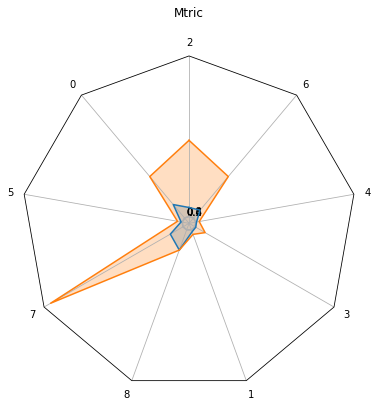

                                                                                            hypothesis
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                            Запустить собственную службу доставки, что сократит срок доставки заказов
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                     Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                              Запустить акцию, дающую ск

In [12]:
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with 'num_vars' axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta



data = [['2',
         '0',
         '5',
         '7',
         '8',
         '1',
         '3',
         '4',
         '6'],
        ('Mtric', [
            [7.0, 13.33, 1.33, 11.2, 16.2, 2.0, 1.125, 1.0, 8.0],
            [56.0, 40.00, 4.00, 112.0, 16.2, 4.0, 9.0, 3.0, 40.0]])]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.show()
print(hypothesis[['hypothesis']])

## Часть 2. Анализ A/B-теста

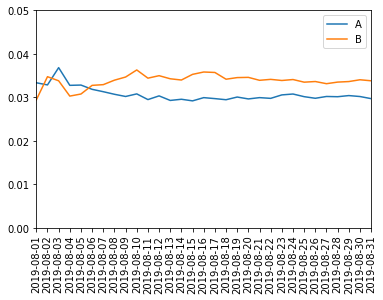

In [13]:
# 1. Постройте график кумулятивной конверсии

# Очистим датафрейм от дубликатов
datesGroups = orders[['date','group']].drop_duplicates()


# агрегированные данные с суммой среднего чека
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получим агрегированные кумулятивные по дням данные
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


# Объединим две таблицы
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

# строим графики
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
#plt.set_xlabel(xlabel, fontsize = 3)
#plt.set_ylabel('')
#plt.xaxis.tick_right()

plt.xticks(rotation=90)
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05]);

Мы не знаем название гипотезы но четко виден тренд приоритета кумулятивной конверcии группы B над группой A. Тест длился один месяц.

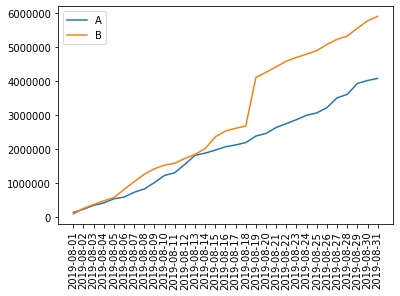

In [14]:
# 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=90)
plt.legend();

Кумулятивная конверсия среднего чека доказывает активность группы B. На мой взгляд в графике даже видно степени принятия гипотезы в относительной величене среднего чека. Если в начале теста группы шли примерно одинаково то после нескольких дней группа B уверенно поднимается над группой A а дальше тренд идет на прогрессивное увеличение и к середине теста определяет скчек в два раза.

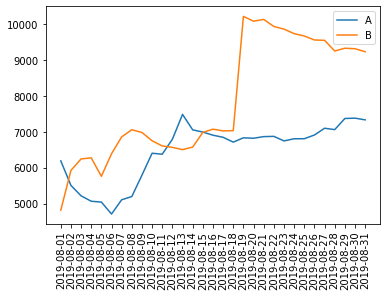

In [15]:
# 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue']/cummulativeDataA['orders'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue']/cummulativeDataB['orders'], label='B')
plt.xticks(rotation=90)
plt.legend();

Из второго графика видно, что вырасла суммма транзакции в заказе на одного пользователя. И тренд на протяжение всего графика повышающийся. Есть огромный всплеск, давольно труднообъяснимый без вникания в саму гипотезу. На мой взгляд очень не естественный и для определения значимости этого подъма нужны дополнительные знания проблематики.

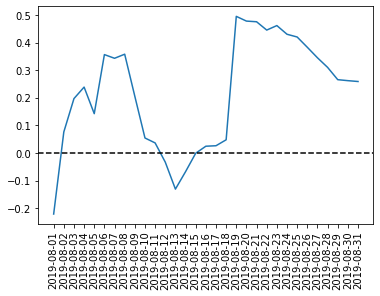

In [16]:
# 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeDataA.merge(cummulativeDataB, left_on='date'\
                                                  , right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date']\
         , (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--');

Опять видим два горба. Даже можно заявить предположительно о тенденции, повышения. О тенденции мы можем только заявить но не говорить отчетливо так как для этого малый интервал теста. Оба горба идут на повышения и падают с каждым разом повышая среднюю линию. Если утверждать о тенденции не можем то точном можем сказать, что это не выбросы, слишком они закономерны.

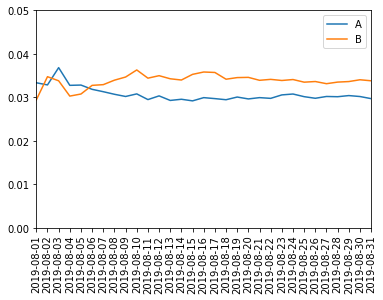

In [17]:
# 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

# строим графики
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.xticks(rotation=90)
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05]);

График показывает, что повысился не только средний чек но конверсия по отношению заказов к пользователю, что в большей степени и объясняет больший чек у группы B. Но что интересно, что тут не видно скачкообразных повышений посещаемости для того чтобы провести зависимость между предъидущими графиками. Из этого можно сделать вивод, что от какого то зависищего фактора тестовая выборка группы B повышала свои заказы ипирично в разрезе месяца.

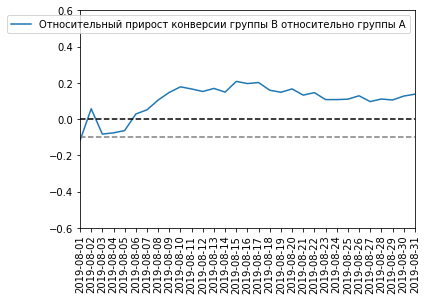

In [18]:
# 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']],\
                                                            left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCummulativeConversions['date'],\
         mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()

plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]);

Пунктирными линиями мы выделил положения средней конверсии. Тенденция приоритета уже понятна, из чего то нового можно сказать, что она с первого дня вышла в тенденции роста, в самом начале был небольшой провал но потом она вышла на рост и некоторую стабильность над среденей выборки группы A

### Анализ выбросов и всплесков: крайние значения данных

In [19]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [20]:
# 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

ordersByUsers = orders.drop(['group', 'revenue', 'date']\
                            ,axis=1).groupby('visitorId', as_index=False)\
                            .agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']
print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


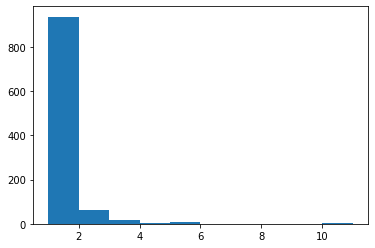

In [21]:
plt.hist(ordersByUsers['orders']);

График количества заказов по пользователям, (кстати этот и следующий график вносит кое-какую ясновсть в характер продукта). Тут мы понимаем, что один пользователь за месяц сделал 11 заказов. Больше всего данных в количестве одна единица.

Так же можно сказать, что больше 6 заказов это выброс который влияет на итоговые данные.

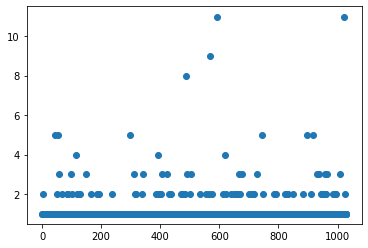

In [22]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

Видно, что в выборке заказ больше 6 единиц можно отсеять как выбросы. они составляют менее 5% выборки.

In [23]:
# 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. 
# Выберите границу для определения аномальных пользователей. 

np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не больше 5 % пользователей оформляет более 2 заказов и 10 процентов пользователей оформили больше 4 заказов.

### Анализ выбросов и всплесков: крайние значения данных

In [24]:
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


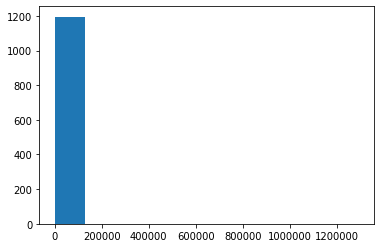

In [25]:
# 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

plt.hist(orders['revenue']);

Основной пул стоимости находится в пределах 1-180 тыс.

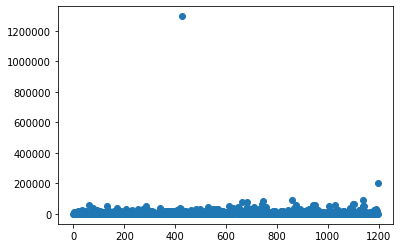

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Видно два выброса и неудивлюсь если они будут биться с всплесками по графикам конверсии. где я писал, что это тенденция. Но может и правда тенденция, что раз в полмесяца появляется человек который покупает товаров в разы больше основной выборки но для нашего теста они меня только запутали))

In [27]:
# 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не больше 5 % пользователей оформляет заказов на сумму более 28000 и 10 процентов пользователей оформили заказы на сумму больше 28233 единицы.

## Анализ A/B-теста с учетом выбросов данных

In [28]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


In [29]:
# 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. 
# Сделайте выводы и предположения.

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head(5))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

In [30]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitors', 'transactions']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitors', 'transactions']

In [31]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions'])), name='transactions');

In [32]:
[ordersByUsersA['transactions'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].\
                                                       sum() - len(ordersByUsersA['transactions'])), name='transactions')];

In [33]:
sampleA = pd.concat([ordersByUsersA['transactions']\
                     ,pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions']))\
                                ,name='transactions')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactions']\
                     ,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions']))\
                                , name='transactions')],axis=0)

In [34]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'transactions']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'transactions']

sampleA = pd.concat([ordersByUsersA['transactions']\
                     ,pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                   .sum() - len(ordersByUsersA['transactions'])), name='transactions')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactions']\
                     ,pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                                   .sum() - len(ordersByUsersB['transactions'])), name='transactions')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Число теста Манна-Уитни меньше p-value (0,05 > 0.008) значит гипотезу о том, что в выборках нет значимых различий отвергаем. и в подтверждение этого регистрируем еще больший прирост новых пользователей (138%)

In [36]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3}Манна-Уитни".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259Манна-Уитни


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

In [37]:
# После того как уберем аномальные данные посмтрим их количество методом shape()
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactions'] > 2]['visitorId']\
                                 , ordersByUsersB[ordersByUsersB['transactions'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
(74,)


In [38]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']\
                                                           .isin(abnormalUsers))]['transactions'],pd.Series\
                             (0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions']))\
                              ,name='transactions')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']\
                                                           .isin(abnormalUsers))]['transactions'],pd.Series\
                             (0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions']))\
                              ,name='transactions')],axis=0)

In [39]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print("{0:.9f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.9f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.006521296
0.172701021


Данные по конверсии немного поменялись. по числу p-value мы так же можем заявить, что выборки в тесте отличаются а вот Прирост в группе B увеличился значительно аж, на 30 пунктов.

In [40]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.369
-0.020


Вот это развязка, после применения корректирующих данных можно констатировать, что выборки действительно различаются так как первое число больше p-value а по данным среднего чека мы можем сказать, что разница всего в 2%. Вот это поворот конечно. Можно смело переписывать все выводы выше, но я их оставлю на память чтобы знать как оно бывает. 

### Вывод 

Если в начале эксперимента был виден четкий рост одной над другой группой. То при применение корректирующих показателей Но значительно снизился но все ровно группа B имеет приоритет над группой B из-за того, что я не знаю сформулировнную гипотезу и не могу предположить косвенно влиящие факторы мое решение остановить эксперимент и зафиксировать победу группы B. Под конец исследования результат стал неразгромным, но достаточный чтобы выразить одну группу над другой. Если средний чек отилчается всего на 2% то другие количественные факторы держат приимущество.